### Лабораторная работа 2: основные понятия

В сегодняшней лабораторной будем работать с данными о проданных на аукционе автомобилях (`Carvana Car Prediction`). Целевым признаком здесь является наличие скрытых продавцом существенных недостатков. 

Carvana &mdash; компания-перекупщик автомобилей, соответственно, ее задача &mdash; не допустить скупку автомобилей со скрытыми недостатками, так как их впоследствии тяжелее продавать.

## 1

Загрузите данные о проданных на аукционе автомобилях. Посмотрите на "сырые" данные. 

Просмотрите файл `DataDictionary-ru.txt` и поймите, что означают столбцы матрицы. Выведите статистику по столбцам.


In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv("lab2.csv", delimiter=',')
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [2]:
text = open('Data_Dictionary2.txt','r', encoding='utf-8').read()
print(text)

Field Name				Definition
RefID				        Unique (sequential) number assigned to vehicles
IsBadBuy				Identifies if the kicked vehicle was an avoidable purchase 
PurchDate				The Date the vehicle was Purchased at Auction
Auction					Auction provider at which the  vehicle was purchased
VehYear					The manufacturer's year of the vehicle
VehicleAge				The Years elapsed since the manufacturer's year
Make					Vehicle Manufacturer 
Model					Vehicle Model
Trim					Vehicle Trim Level
SubModel				Vehicle Submodel
Color					Vehicle Color
Transmission				Vehicles transmission type (Automatic, Manual)
WheelTypeID				The type id of the vehicle wheel
WheelType				The vehicle wheel type description (Alloy, Covers)
VehOdo					The vehicles odometer reading
Nationality				The Manufacturer's country
Size					The size category of the vehicle (Compact, SUV, etc.)
TopThreeAmericanName			Identifies if the manufacturer is one of the top three American manufacturers
MMRAcquisitionAuctionAveragePrice	Acquisiti

## 2

Постройте график рассеяния с пробегом в качестве оси абсцисс и ценой `MMRCurrentRetailAveragePrice` в качестве оси ординат. Автомобили без недостатков отметьте зеленым цветом, со скрытыми недостатками — красным.

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

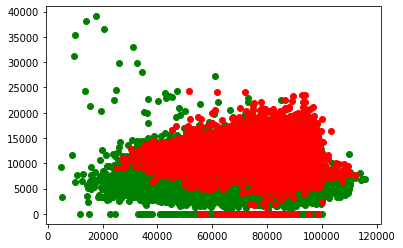

In [9]:
df['ProbegvGod'] = df['VehOdo']/df['VehicleAge']

bad = df['ProbegvGod'] > 25000
bad = df.loc[bad, ('VehOdo', 'MMRCurrentRetailAveragePrice')]

good = df['ProbegvGod'] < 25000
good = df.loc[good, ('VehOdo', 'MMRCurrentRetailAveragePrice')]
plt.scatter(good['VehOdo'], good['MMRCurrentRetailAveragePrice'], color = 'g')
plt.scatter(bad['VehOdo'], bad['MMRCurrentRetailAveragePrice'], color = 'r')

# Регрессия

## 3a

Импортируйте из библиотеки `sklearn` все модели машинного обучения:

`from sklearn import *`

Трактуя задачу о предсказании наличия недостатков как задачу регрессии, натренируйте линейную модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на каком-нибудь подмножестве признаков (например, тех же `VehOdo` и `MMRCurrentRetailAveragePrice`). 

С какой проблемой вы столкнулись? Какие способы ее решения вы можете предложить?

*Функции, которые могут пригодиться при решении: `.fit(), .loc[], pd.notnull()`*

*Создание модели:* `model1 = linear_model.LinearRegression()`

*Тренировка:*
`model1.fit(x, y)`



In [12]:
# место для кода
from sklearn import *
import numpy as np

i = pd.notnull(df['MMRCurrentRetailAveragePrice'])
svoystva = ['MMRCurrentRetailAveragePrice', 'VehOdo']
X = df.loc[i, svoystva].values
y = df.loc[i, 'IsBadBuy'].values
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.25, random_state = 0)
model = linear_model.LinearRegression().fit(X_train, y_train)

## 3b

Выполните предсказание для всех объектов обучающей выборки и присвойте результат переменной prediction

*Функции, которые могут пригодиться при решении: `model.predict()`*

In [13]:
# место для кода
prediction = model.predict(X_test)

## 3c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Это можно сделать, например, используя list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [14]:
# место для кода
predictionClass = np.array([1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])])

## 3d

Постройте отчет по качеству классификации и матрицу ошибок. Как изменятся отчет и матрица ошибок, если изменить порог в задании 3c (по умолчанию его значение равно 0.5)?

*Функции, которые могут пригодиться при решении: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функция classification_report для каждого класса объектов считает точность (precision) в этом классе и полноту (recall). Полнота - это процент объектов данного класса, которые ваш метод предсказания тоже отнес к этому классу, среди всех объектов данного класса. Точность (precision) - то же самое, только среди всех объектов, предсказанных для этого класса.

Функция confusion_matrix возвращает матрицу с количествами объектов. Номера столбцов матрицы - это номера предсказанных классов, строки - это номера правильных классов. Например, элемент M[0,1] - это количество машин, где на самом деле IsBadBuy = 0, а вы предсказали 1.

In [15]:
# место для кода
print(metrics.classification_report(y_test, predictionClass))
print(metrics.confusion_matrix(y_test, predictionClass))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     15920
           1       0.00      0.00      0.00      2247

    accuracy                           0.88     18167
   macro avg       0.44      0.50      0.47     18167
weighted avg       0.77      0.88      0.82     18167

[[15920     0]
 [ 2247     0]]


D:\Users\www\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Классификация

## 4a
Трактуя задачу как задачу классификации, постройте модель классификации «решающее дерево» глубины 20  (все аналогично линейной регрессии).


*Функции, которые могут пригодиться при решении: `tree.DecisionTreeClassifier(max_depth=20) `*

In [16]:
# место для кода
clas = tree.DecisionTreeClassifier(max_depth = 20).fit(X_train, y_train)

## 4b

Решающее дерево предсказывает вероятности. С помощью построенной модели рассчитайте вероятности наличия скрываемых недостатков.

*Функции, которые могут пригодиться при решении: `model.predict_proba() `*

In [17]:
# место для кода
predskaz = clas.predict_proba(X_test)

## 4c

Преобразуйте получившийся вектор предсказаний `prediction` к значениям `{0,1}`. Постройте отчет о классификации и матрицу ошибок. Какой метод оказался лучше?

In [18]:
# место для кода
predskaz2 = [predskaz[i][0] < predskaz[i][1] for i in range(predskaz.shape[0])]
print(metrics.classification_report(y_test, predskaz2))
print(metrics.confusion_matrix(y_test, predskaz2))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     15920
           1       0.18      0.06      0.09      2247

    accuracy                           0.85     18167
   macro avg       0.53      0.51      0.51     18167
weighted avg       0.79      0.85      0.81     18167

[[15242   678]
 [ 2103   144]]


# Кросс-валидация
## 5a


Разделите исходную выборку на две части, например, используя [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [19]:
# место для кода
dataTrain, dataTest, resTrain, resTest = model_selection.train_test_split(X, y, test_size = 0.5, random_state = 0)

## 5b

Натренируйте решающее дерево на  `dataTrain` и примените к  `dataTrain` и dataTest, вычислив для каждого случая точность предсказания. 

Проведите несколько экспериментов для различных глубин дерева. Напишите в комментариях, для каких глубин модель недообучена, для каких переобучена и где точка раннего останова.

*Функции, которые могут пригодиться при решении: `metrics.accuracy_score() `*

In [20]:
# место для кода
glubina = [15,30,45]

for i in glubina:
    print("Depth: ", i)
    model_i = tree.DecisionTreeClassifier(max_depth = i)
    model_i.fit(dataTrain, resTrain)
    prediction_i = model_i.predict(dataTrain)
    print("Train Accuracy: ", metrics.accuracy_score(resTrain, prediction_i))
    
    prediction_i = model_i.predict(dataTest)
    print("Test Accuracy: ", metrics.accuracy_score(resTest, prediction_i))

Depth:  15
Train Accuracy:  0.8999834865415314
Test Accuracy:  0.8591401992623988
Depth:  30
Train Accuracy:  0.9718720757417295
Test Accuracy:  0.806104475147245
Depth:  45
Train Accuracy:  0.9978807728298563
Test Accuracy:  0.7874717895084494


# Решающая функция
## 6a

Вернемся к модели решающего дерева глубины 20, построенного по всей обучающей выборке `data`. Пусть цена ошибки неправильного предсказания 0 равна 1000, а неправильного предсказания 1 — 100.

Вычислите функцию потерь &mdash; среднюю ошибку на всей обучающей выборке.

In [21]:
# место для кода
X1 = X
Y1 = y
T = tree.DecisionTreeClassifier(max_depth = 20).fit(X1, Y1)
Res = T.predict(X1)
Sum = 0
for i, j in zip(Res, Y1):
    if j == 0 and i == 1:
        Sum += 1000
    if j == 1 and i == 0:
        Sum += 100
print(Sum / Res.size)

9.839269004238455


## 6b

Выясните, как нужно изменить решающую функцию `[0 if predictionProb[i][0] > 0.5 else 1 for i in range(prediction.shape[0])]`, чтобы функция потерь была минимальна?

Найдите оптимальную решающую функцию и минимальное значение функционала потерь методом подбора или пользуясь формулой из лекции 2 (слайд Decision function).



In [22]:
# место для кода
predictionClass = np.array([0 if Res[i] > 0.5 else 1 for i in range(Res.shape[0])])